# Neural Network

Nbviewer [https://nbviewer.jupyter.org/github/shaundsouza/deep-learning/blob/master/notebooks/nnet.ipynb](https://nbviewer.jupyter.org/github/shaundsouza/deep-learning/blob/master/notebooks/nnet.ipynb)

Code [https://nbviewer.jupyter.org/format/script/github/shaundsouza/deep-learning/blob/master/notebooks/nnet.ipynb](https://nbviewer.jupyter.org/format/script/github/shaundsouza/deep-learning/blob/master/notebooks/nnet.ipynb)


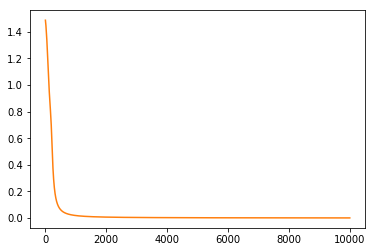

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

get_ipython().magic('matplotlib inline')

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def diff_sigmoid(t):
    return t * (1 - t)

def od(t, y):
    return diff_sigmoid(t) * (y - t)

def nn_error(x, w1, w2, y):
    h = sigmoid(np.matmul(x, w1))
    t = sigmoid(np.matmul(h, w2))
    return sum((y - t)**2)

fig, ax = plt.subplots()

x = np.array([1.5,2,1,3.5,3,4,3,1,2,4,3,2,1,1,1,1,1,1]).reshape(3,6).T
size_x = x.shape

y = np.array([0,0,0,1,1,1]).reshape(6,1)
size_y = y.shape

size_h = 2
err = []

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(err[i][0], err[i][1])
    return (line,)

# w1 = np.array([.2,-.1,.4,.7,-1.2,1.2]).reshape(2,3).T
# w2 = np.array([1.1,.1]).reshape(1,2).T
# w2 = np.array([1.1,.1,3.1,1.17]).reshape(2,2).T
w1 = np.random.randn(3, 2)
w2 = np.random.randn(2, 1)

err_prev = 100
# print(x)
# print(w1)
# print(w2)

for n in range(10000):
    e = nn_error(x, w1, w2, y) 
    err.append(e)
#     print(n, e)

    if (e > err_prev):
        break

    err_prev = e

    for i in range(size_x[0]):
        h = sigmoid(np.dot(x[i,:], w1))
        t = sigmoid(np.dot(h, w2))

        d_o = od(t, y[i,:])
        backp = d_o * w2
        d_h = h * (1 - h) * backp.ravel()

        a=0.3

        for j in range(size_x[1]):
            d_w1 = a * x[i, j] * d_h
            w1[j,:] = w1[j,:] + d_w1

        for j in range(size_h):
            d_w2 = a * h[j] * d_o
            w2[j,:] = w2[j,:] + d_w2

h = sigmoid(np.matmul(x, w1))
t = sigmoid(np.matmul(h, w2))
# print(w1)
# print(w2)
# print(t)

plt.plot(err)
plt.show()

# anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(err))

# HTML(anim.to_html5_video())



